In [34]:
from IPython.display import Latex

## 11.1 Countable and Uncountable sets

The set of natural numbers

$\bm{N} = \{1,2,3,4,...\}$

invertible mapping $\forall x\in X$ precisely one $y \in Y$

one-to-one correspondence

### Example 11.1.1

Show that the set of even natural numbers $E =\{2,4,6, . . .\}$ is countable.

### Example 11.1.2
Show that the integers are countable.

A set X is countable if it can be written as a list $\{x1, x2, x3, . . .\}$, with every

$x \in X$ appearing somewhere in the list. In other words, given any x, there is some

finite $n$ such that $x_n \in x$.

### Example 11.1.3
Show that the positive rational numbers are countable.

![avatar](..\\fig\\11.1.1.png)


### EXAMPLE 11.1.4
Let X denote the set of all real numbers between 0 and 1. Show that X is
uncountable.

$x_1 = 0.x_{11}x_{12}x_{13}x_{14}...$\
$x_2 = 0.x_{21}x_{22}x_{23}x_{24}...$\
$x_3 = 0.x_{31}x_{32}x_{33}x_{34}...$\
$\vdots$

## Exercise 11.1.1

Why doesn’t the diagonal argument used in Example 11.1.4 show that

the rationals are also uncountable? (After all, rationals can be represented as decimals.)

## 11.2 Cantor Set

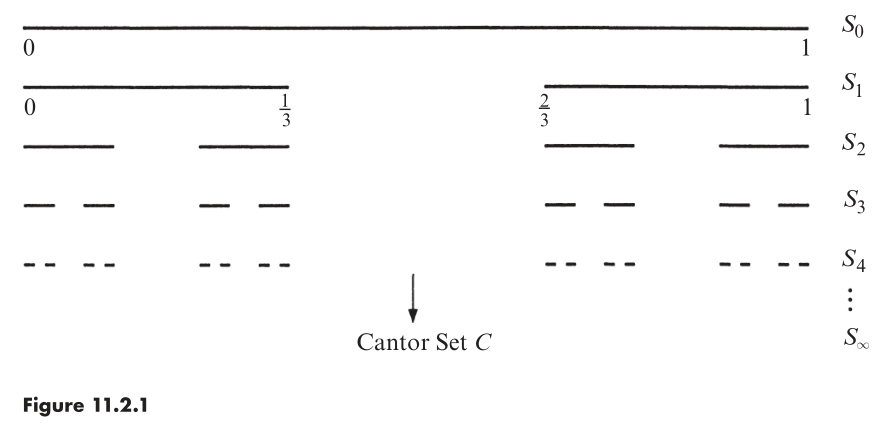


1. C has structure at arbitrarily small scales.
2. C is self-similar.
3. The dimension of C is not an integer.

C has measure zero and it consists of uncountably many points.

### EXAMPLE 11.2.1:

Show that the **measure** of the Cantor set is zero, in the sense that it can be covered

by intervals whose total length is arbitrarily small.

### EXAMPLE 11.2.2:
Show that the Cantor set C consists of all points $c \in [ 0, 1 ]$ that have no 1’s in
their base-3 expansion.

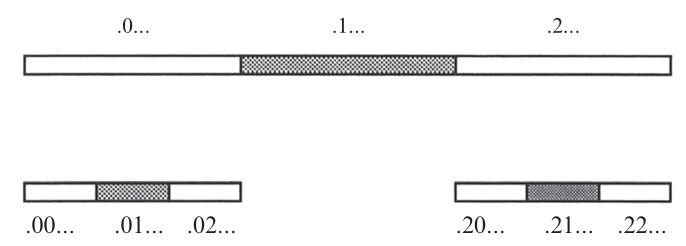

### EXAMPLE 11.2.3:
Show that the Cantor set is uncountable.

## 11.3 Dimension of Self-Similar Fractals

What is the “dimension” of a set of points? 

we could say that *the dimension is the minimum number of coordinates needed to describe every point in the set*. 

when we try to apply this definition to fractals, we quickly run into paradoxes. 

Consider the **von Koch curve**,

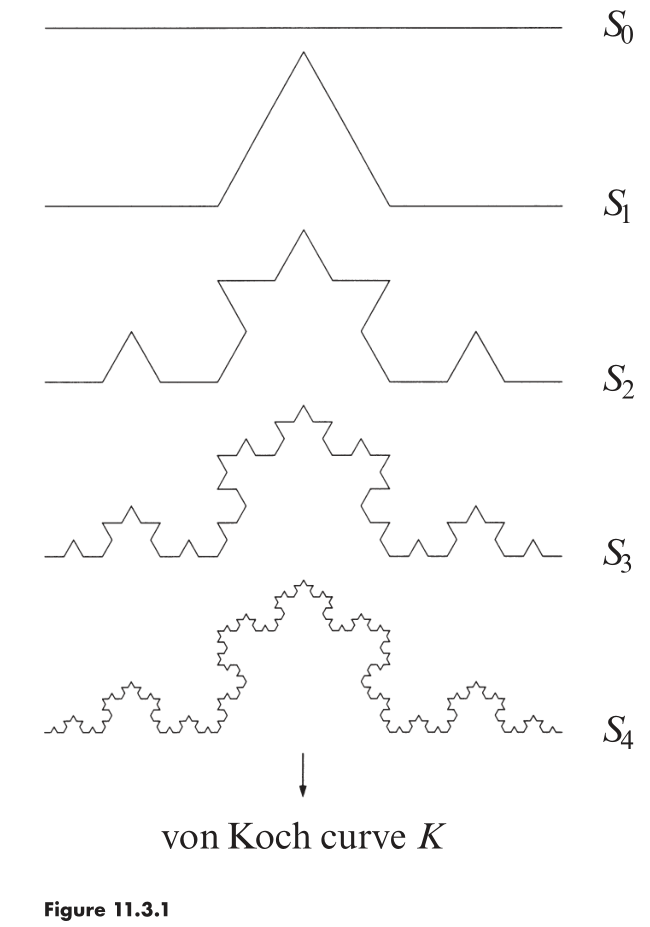

$L_1 = \frac{4}{3}L_0$

$L_n = \frac{4}{3}L_{n-1}$ = $(\frac{4}{3})^nL_0$

$L_n \rightarrow \infty$ as $n \rightarrow \infty$

Hence points on K aren’t determined by their arc length from a particular

point, because every point is infinitely far from every other

<br  />

This suggests that K is more than one-dimensional. But would we really want to

say that K is two-dimensional? It certainly doesn’t seem to have any “area.”

<br  />

With this paradox as motivation, we now consider some improved notions of
dimension that can cope with fractals.

### Similarity Dimension

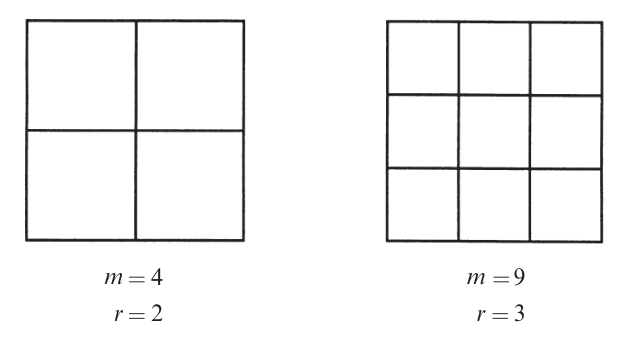

$m$ = number of copies, $r$ = scaling factor

Then the similarity dimension d is the exponent defined by $m =r ^ d$, or equivalently

$d = \frac{\ln m}{\ln r}$

Suppose that a self-similar set is composed of $m$ copies of itself scaled down by a factor of $r$.

### EXAMPLE 11.3.1:
Find the similarity dimension of the Cantor set C.

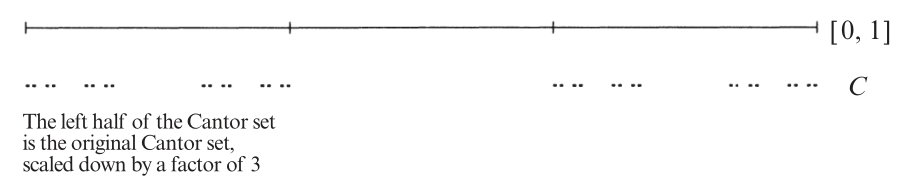

$m = 2$, $r = 3$. Thus, $d = \frac{\ln 2}{\ln 3} \approx 0.631$

### EXAMPLE 11.3.2:
Show that the von Koch curve has a similarity dimension of $ln 4/ln 3 \approx 1.26$.

### More General Cantor Sets

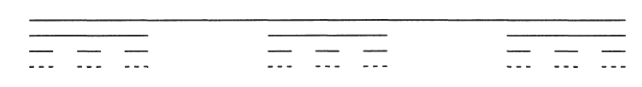

We call the limiting set the even-fifths Cantor set, since the even fifths are removed

at each stage. (Similarly, the standard Cantor set of Section 11.2 is often called the

middle-thirds Cantor set.)

### EXAMPLE 11.3.3:
Find the similarity dimension of the even-fifths Cantor set.

$m = 3$, $r = 5$. Thus, $d = \frac{\ln 3}{\ln 5} \approx 0.682$

A closed set S is called a topological Cantor set

1. S is "totally disconnected."
2. On the other hand, S contains no "isolated points."

## 11.4 Box Dimension

Various definitions have been proposed; see Falconer (1990) for a lucid discussion

All the definitions share the idea of "measurement at a scale $\epsilon$"

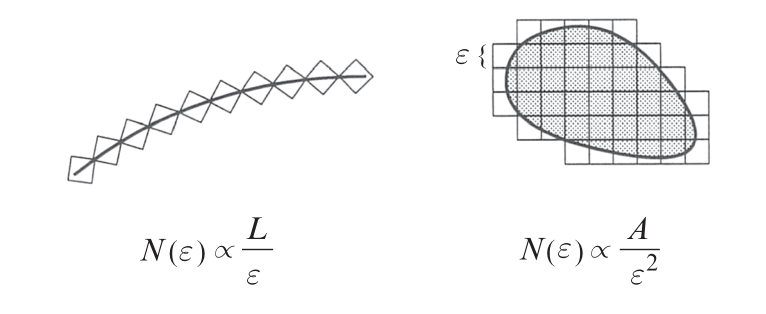




Let $S$ be a subset of D-dimensional Euclidean space, and 

let $N ( \epsilon )$ be the minimum number of D-dimensional cubes of side $\epsilon$ needed to cover $S$.

The key observation is that the dimension of the set equals the exponent d in the power law $N ( \epsilon ) \propto 1 / \epsilon ^ d$.

**box dimension**

$d = \lim\limits_{\epsilon \to 0} \frac{N(\epsilon)}{\ln(1/\epsilon)}$, if the limit exists

### EXAMPLE 11.4.1:
Find the box dimension of the Cantor set.

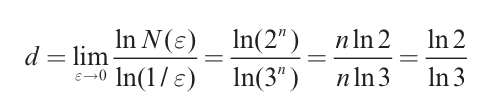


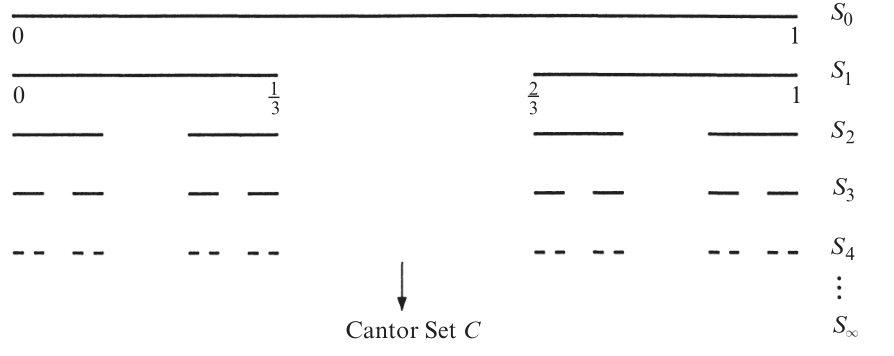


### EXAMPLE 11.4.2:
A fractal that is not self-similar is constructed as follows.

A square region is divided into nine equal squares, and then one of the small squares is selected at
random and discarded.

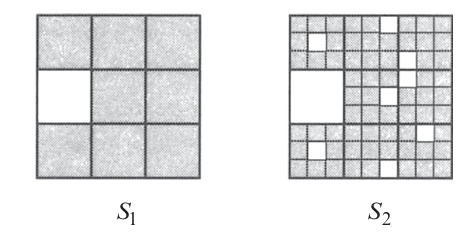

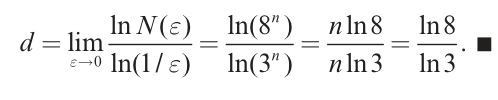

## 11.5 Pointwise and Correlation Dimensions

back to the Lorenz dynamics. 

Now that we have many points on the attractor, we could try computing the box dimension, but that approach is impractical.

Grassberger and Procaccia (1983) proposed a more efficient approach that has become standard. 

1. Fix a point $x$ on the attractor $A$.
2. Let $N_x ( \epsilon )$ denote the number of points on $A$ inside a ball of radius $\epsilon$ about $x$

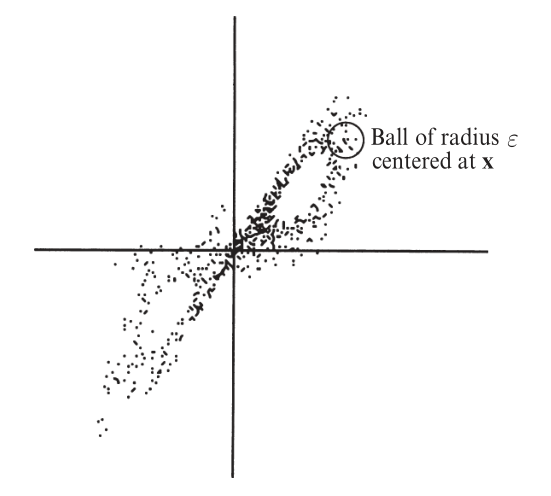


Now vary $\epsilon$. As $\epsilon$ increases, the number of points in the ball typically grows as
a power law:

$N_x(\epsilon) \propto \epsilon^d$

where d is called the **pointwise dimension** at x

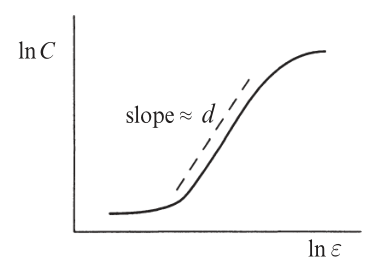

In [18]:
import numpy as np

def lorenz(x, y, z, r, sigma, beta, dt, num_steps):
    points = []
    for _ in range(num_steps):
        dx = sigma * (y - x)
        dy = r * x - y - x * z
        dz = x * y - beta * z
        x += dt * dx
        y += dt * dy
        z += dt * dz
        points.append([x, y, z])
    return np.array(points)

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def correlation_integral(points, epsilon):
    num_points = len(points)
    count = 0
    for i in range(num_points):
        for j in range(i + 1, num_points):
            if distance(points[i], points[j]) < epsilon:
                count += 1
    return count

# Parameters
r = 28
sigma = 10
beta = 8/3
dt = 0.01
num_steps = 10000
epsilon = 0.1

# Generate Lorenz attractor points
x0, y0, z0 = (1, 1, 1)  # Initial conditions
points = lorenz(x0, y0, z0, r, sigma, beta, dt, num_steps)

# Compute correlation integral
correlation_count = correlation_integral(points, epsilon)

# Compute pointwise dimension
pointwise_dimension = np.log(correlation_count) / np.log(1 / epsilon)
print("Pointwise dimension:", pointwise_dimension)

Pointwise dimension: 2.8215135284047728


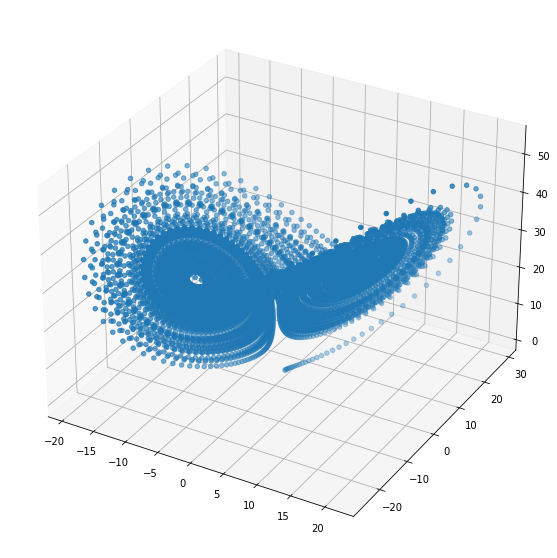

In [29]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': '3d'})
ax.scatter(points[:, 0], points[:, 1], points[:,2])

In [33]:
from tqdm import tqdm
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def correlation_integral(points, epsilon):
    num_points = len(points)
    count = 0
    for i in range(num_points):
        for j in range(i + 1, num_points):
            if distance(points[i], points[j]) < epsilon:
                count += 1
    return count

def average_correlation_integral(points, epsilon_values):
    num_points = len(points)
    correlation_counts = []
    for epsilon in epsilon_values:
        count = 0
        for i in tqdm(range(num_points)):
            for j in range(i + 1, num_points):
                if distance(points[i], points[j]) < epsilon:
                    count += 1
        correlation_counts.append(count)
    return np.array(correlation_counts)

# Parameters
r = 28
sigma = 10
beta = 8/3
dt = 0.01
num_steps = 10000
epsilon_values = np.logspace(-2, 0, num=20)  # Epsilon values in logarithmic scale

# Generate Lorenz attractor points
#x0, y0, z0 = (1, 1, 1)  # Initial conditions
#points = lorenz(x0, y0, z0, r, sigma, beta, dt, num_steps)

# Compute average correlation integral
correlation_counts = average_correlation_integral(points[8000:], epsilon_values)

# Compute correlation dimension
log_epsilon = np.log(epsilon_values)
log_correlation_counts = np.log(correlation_counts)
coeffs = np.polyfit(log_epsilon, log_correlation_counts, 1)
correlation_dimension = -coeffs[0]
print("Correlation dimension:", correlation_dimension)

100%|██████████| 2000/2000 [00:19<00:00, 104.07it/s]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_137404\3945341282.py:43: RuntimeWarning: divide by zero encountered in log
  log_correlation_counts = np.log(correlation_counts)


Correlation dimension: nan


In [31]:
correlation_count

663

### EXAMPLE 11.5.2:

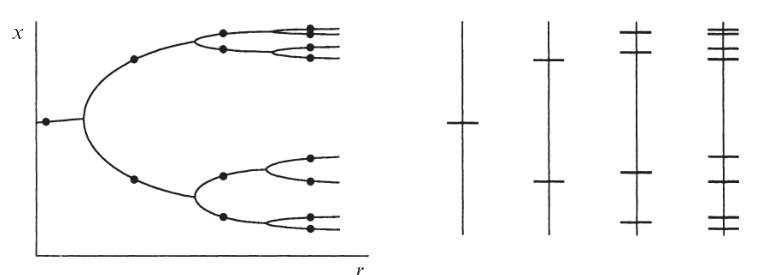

### Multifractals

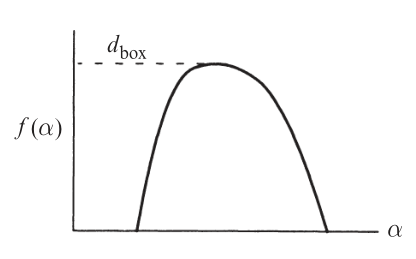

### Glossary

measure 测度

Fractal 分形

self-similar dimension 自相似维数

box dimension 盒维数

pointwise dimension 点态维数

correlation dimension 关联维数
